In [23]:
from collections import deque


def play_game(n_players, last_marble):
    ring = deque([0])
    scores = [0] * n_players
    for x in range(1, last_marble + 1):
        if x % 23 == 0:
            ring.rotate(7)
            scores[x % n_players] += x + ring.pop()
            ring.rotate(-1)
        else:
            ring.rotate(-1)
            ring.append(x)
    return max(scores)


play_game(452, 7125000)

3212081616

---

In [2]:
class Players:
    def __init__(self, num_players: int):
        self.num_players = num_players
        self.current = 0
        self.scores = [0] * num_players

    def pass_turn(self):
        self.current += 1
        if self.current >= self.num_players:
            self.current = 0

    def score(self, points):
        self.scores[self.current] += points

    @property
    def winner_score(self):
        return max(self.scores)


class Ring:
    def __init__(self, k=23, shift=9):
        self.ring = []
        self.pointer = 0
        self.n = -1
        self.k = k
        self.shift = shift

    def insert(self):
        self.n += 1

        p1 = self._shift_pointer(self.pointer)
        p2 = self._shift_pointer(self._shift_pointer(self.pointer))

        if p2 > p1:
            self.ring.insert(p2, self.n)
            self.pointer = p2
        else:
            self.ring.append(self.n)
            self.pointer = len(self.ring) - 1

    def score(self):
        if self.n == 0:
            return 0

        if self.n % self.k != 0:
            return 0

        total = self.n
        del self.ring[self.pointer]

        self.pointer -= self.shift
        if self.pointer < 0:
            self.pointer += len(self.ring)

        total += self.ring[self.pointer]
        del self.ring[self.pointer]

        return total

    def _shift_pointer(self, p):
        p += 1
        if len(self.ring) == 0:
            p = 0
            return p
        if p >= len(self.ring):
            p %= len(self.ring)
        return p

In [3]:
from tqdm import tqdm

In [8]:
def play_game(num_players, max_stone, verbose=True):
    ring = Ring()
    players = Players(num_players=num_players)

    loop = range(max_stone + 1)
    loop = tqdm(loop) if verbose else loop
    for turn_num in loop:
        ring.insert()
        if turn_num == 0:
            continue
        players.score(ring.score())
        players.pass_turn()

    return players.winner_score

* 10 players; last marble is worth 1618 points: high score is 8317
* 13 players; last marble is worth 7999 points: high score is 146373
* 17 players; last marble is worth 1104 points: high score is 2764
* 21 players; last marble is worth 6111 points: high score is 54718
* 30 players; last marble is worth 5807 points: high score is 37305


In [5]:
assert play_game(10, 1618) == 8317
assert play_game(13, 7999) == 146373
assert play_game(17, 1104) == 2764
assert play_game(21, 6111) == 54718
assert play_game(30, 5807) == 37305

100%|███████████████████████████████████| 5808/5808 [00:00<00:00, 174273.82it/s]


---

In [6]:
load(9).strip()

'452 players; last marble is worth 71250 points'

In [7]:
play_game(452, 71250)

100%|██████████████████████████████████| 71251/71251 [00:00<00:00, 79016.16it/s]


388844

In [9]:
play_game(452, 7125000)

3212081616

---

In [ ]:
def insert(state, pointer, number):
    if len(state) == 0:
        state.append(number[0])
        pointer[0] = 0
    elif len(state) == 1:
        state.append(number[0])
        pointer[0] = 1
    else:
        pointer[0] = (pointer[0] + 1) % len(state)
        if pointer[0] == len(state) - 1:
            state.append(number[0])
            pointer[0] += 1
        else:
            pointer[0] = (pointer[0] + 1) % len(state)
            state.insert(pointer[0], number[0])

    number[0] += 1


def score(state, pointer, number, k=23, shift=9):
    if (number[0] - 1) == 0:
        return 0

    if (number[0] - 1) % k != 0:
        return 0

    score = number[0] - 1
    del state[pointer[0]]

    pointer[0] -= shift
    if pointer[0] < 0:
        pointer[0] += len(state)

    score += state[pointer[0]]
    del state[pointer[0]]

    return score


def play_game(num_players: int, num_marbles: int):
    player = Turn(num_players=num_players)
    game_state = []
    scores = [0] * player.num_players
    p = [0]
    n = [0]

    for i in range(num_marbles + 1):
        insert(game_state, p, n)
        scores[player.current - 1] += score(game_state, p, n)
        player.done()

    return scores

In [12]:
import numpy as np

assert np.max(play_game(10, 1618)) == 8317
assert np.max(play_game(13, 7999)) == 146373
assert np.max(play_game(21, 6111)) == 54718
assert np.max(play_game(30, 5807)) == 37305
assert np.max(play_game(17, 1104)) == 2764

NameError: name 'Turn' is not defined

---

In [8]:
import matplotlib.pyplot as plt

In [9]:
highest_scores = [max(t[1].values()) for t in history]
remainders = [x[0] for x in history]

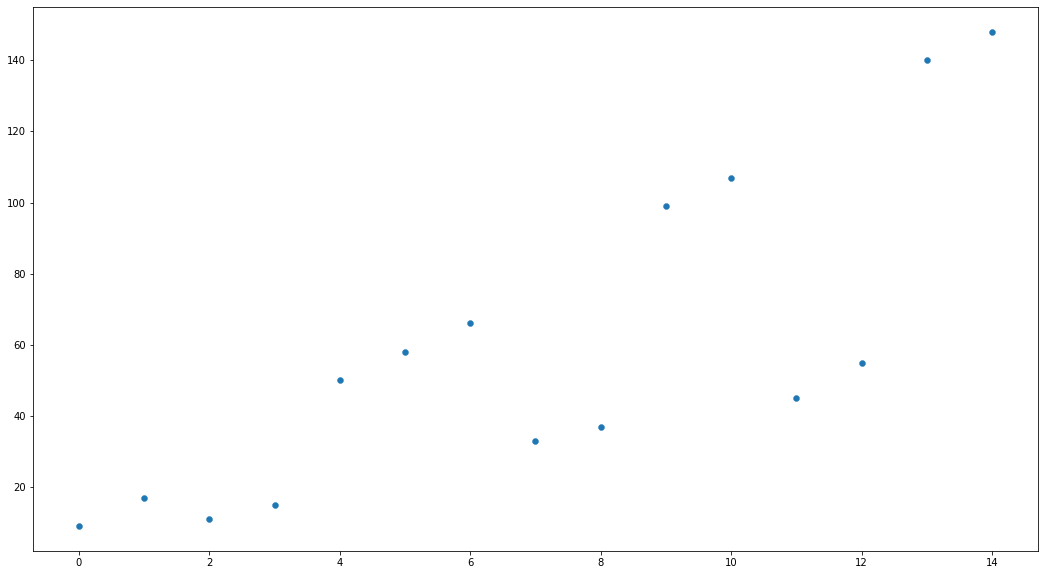

In [10]:
plt.figure(figsize=(18, 10))
plt.scatter(np.arange(len(remainders[:15])), remainders[:15], lw=0.4)

In [12]:
import pandas as pd

In [13]:
pd.Series(remainders).loc[[0, 1, 4, 5, 6, 9, 10]].reset_index()

,index,0
0,0,9
1,1,17
2,4,50
3,5,58
4,6,66
5,9,99
6,10,107


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
clf = LinearRegression()
clf.fit

<bound method LinearRegression.fit of LinearRegression()>

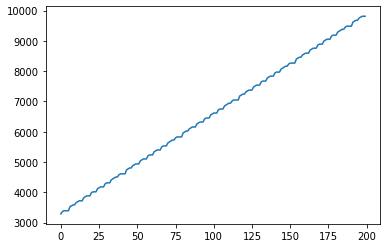

In [16]:
plt.plot([max(t[1].values()) for t in history[100:300]])

In [26]:
[k for k, v in scores.items() if v == max(scores.values())]

[198]

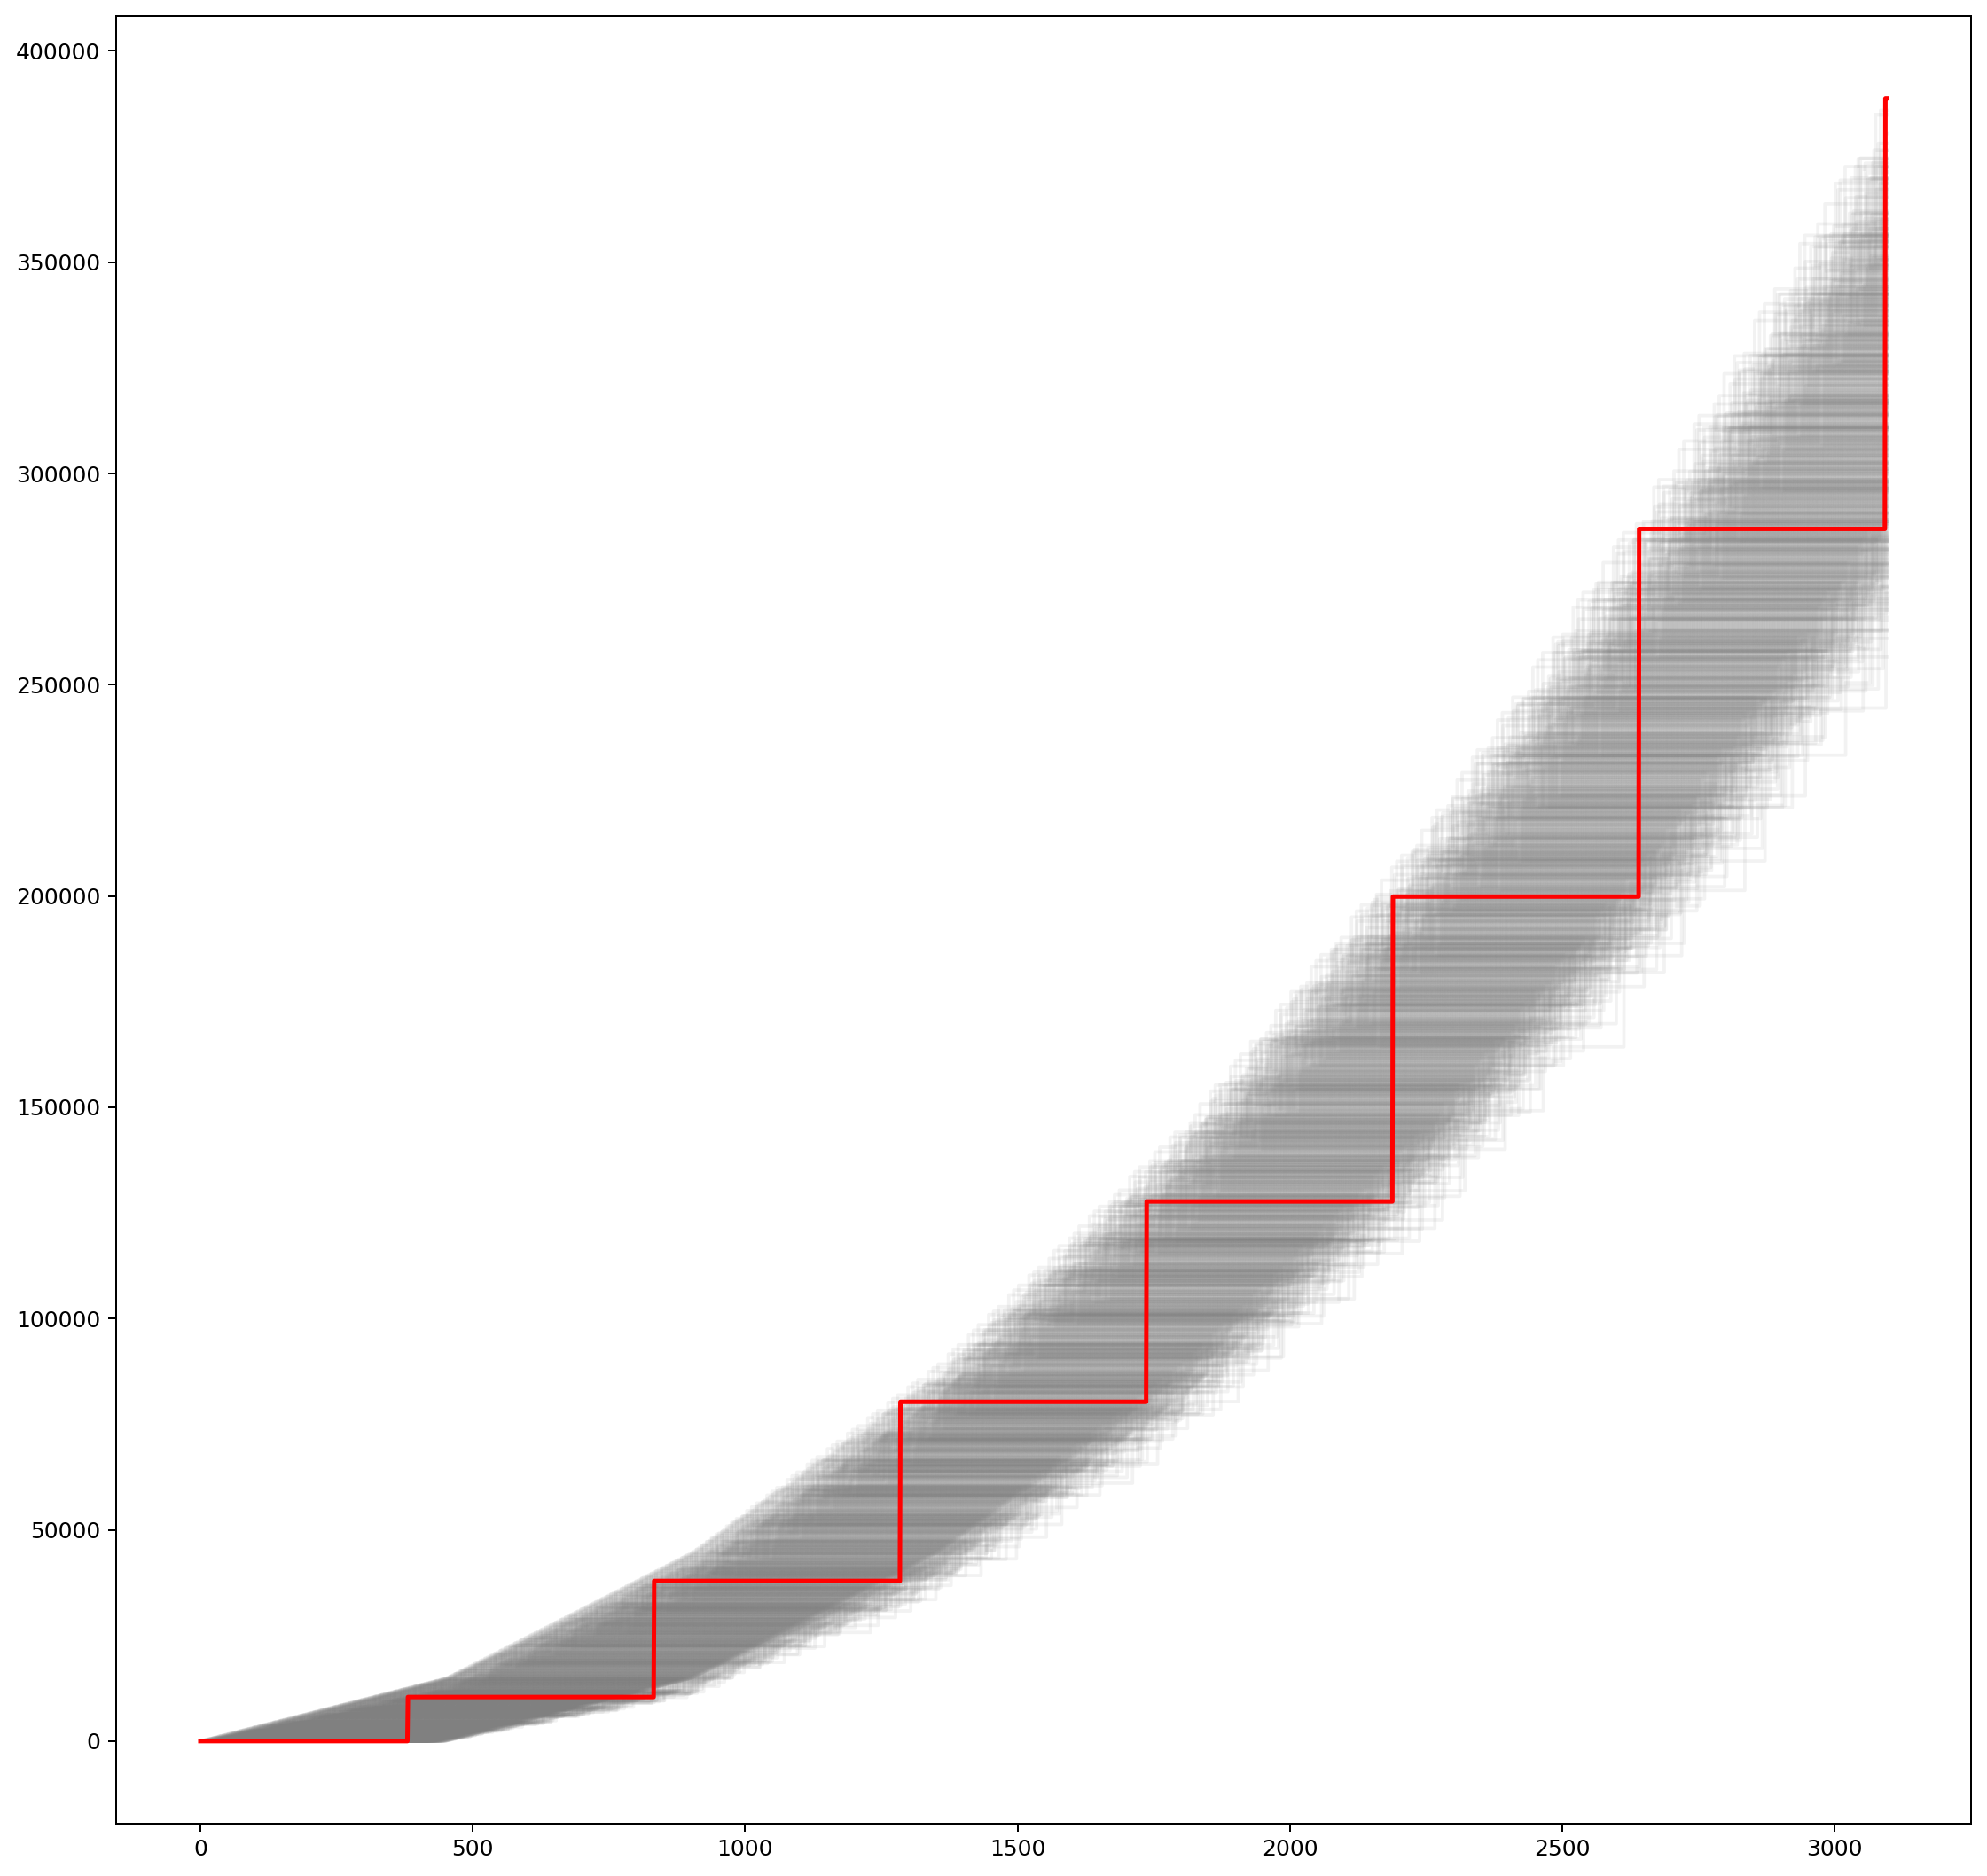

In [31]:
plt.figure(figsize=(15, 15), dpi=180)

for player_i in range(1, 453):
    line = [history[t].get(player_i, 0) for t in range(len(history))]
    if player_i == 198:
        plt.plot(np.arange(len(line)), line, alpha=1, lw=2, c="red", zorder=10)
        best_line = line
    else:
        plt.plot(np.arange(len(line)), line, alpha=0.1, c="gray")

In [37]:
from collections import Counter

In [55]:
Counter(best_line)

Counter({0: 381,
         10428: 452,
         37903: 452,
         80272: 452,
         127722: 452,
         199870: 452,
         286912: 452,
         388844: 4})